In [31]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

In [77]:
variables = {'V0', 'X1', 'X2', 'X3', 'Y1', 'Y2', 'Y3', 'Z1', 'Z2'}
data = {var: np.array([]) for var in variables}

In [78]:
# Loop through all the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a .h5 file
    if filename.endswith('.h5'):
        # Get the full path to the file
        file_path = os.path.join(folder_path, filename)
        # Process the file
        with h5py.File(file_path, 'r') as f:
            traces = f['data']['traces']
            for group in traces:
                data[group] = np.concatenate((data[group], traces[group][()]['values']))

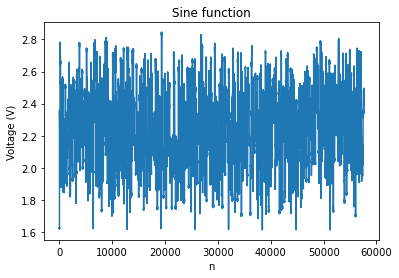

In [81]:
plt.plot(data['X1'])
plt.xlabel('n')
plt.ylabel('Voltage (V)')
plt.title('Sine function')
plt.show()